In [1]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Download a small pretrained Word2Vec model for demo
model = api.load("glove-wiki-gigaword-50")  # 50-dimensional embeddings
print("Vocabulary size:", len(model.key_to_index))

Vocabulary size: 400000


👉 This loads embeddings trained on Wikipedia + Gigaword data. Each word is represented as a 50-dimensional vector.

In [4]:
# Look at the embedding vector for a single word
word = "king"
vector = model[word]
print(f"Embedding for '{word}':\n", vector)
print("Vector dimension:", vector.shape)

Embedding for 'king':
 [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Vector dimension: (50,)


👉 This is just a list of 50 numbers. Alone they mean little, but collectively they capture the semantic essence of the word.

In [5]:
# Find most similar words to "king"
print(model.most_similar("king", topn=5))

# Compare similarities between pairs
print("Similarity(king, queen):", model.similarity("king", "queen"))
print("Similarity(king, apple):", model.similarity("king", "apple"))

[('prince', 0.8236179947853088), ('queen', 0.7839042544364929), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.7667195200920105)]
Similarity(king, queen): 0.7839043
Similarity(king, apple): 0.30468506


👉 Cosine similarity measures closeness in the embedding space.

In [6]:
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=3)
print("Analogy result (king - man + woman):", result)

Analogy result (king - man + woman): [('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.7592144012451172)]


👉 Embeddings capture relationships like gender or royalty in their vector arithmetic.

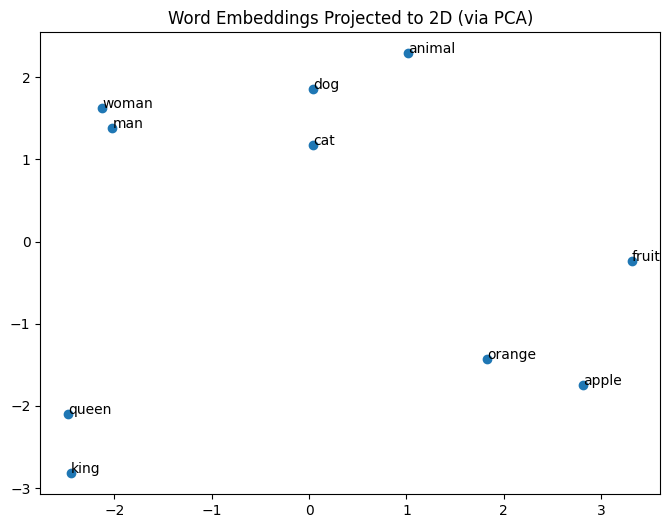

In [7]:
# Pick some words to visualize
words = ["king", "queen", "man", "woman", "apple", "orange", "fruit", "dog", "cat", "animal"]
vectors = np.array([model[w] for w in words])

# Reduce dimensions from 50D → 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))
plt.title("Word Embeddings Projected to 2D (via PCA)")
plt.show()